# TensorFlow的分类器模型构建(监督学习)归一化后--回调函数
使用数据集-> Fashion Mnist

In [3]:
import os
from tensorflow import keras
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 这串代码让图像直接显示在Notebook里而不是单独打开一个窗口
%matplotlib inline

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

# 训练集 验证集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

# 归一化前的max和min
print(np.max(x_train), np.min(x_train))

255 0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

# 归一化后的max和min
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(200 , activation = 'selu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

In [16]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"]
)

In [17]:
# 记录callbacks的文件夹与文件
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

#
history = model.fit(x_train_scaled, y_train,
                    epochs=10,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=[
                        keras.callbacks.EarlyStopping(patience = 5 , min_delta = 1e-3),
                        keras.callbacks.ModelCheckpoint(
                            output_model_file, save_best_only=True),
                        keras.callbacks.TensorBoard(logdir)
                    ]
                    )

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 22s 391us/sample - loss: 0.8567 - accuracy: 0.7099 - val_loss: 0.6296 - val_accuracy: 0.7882
Epoch 2/10
55000/55000 [==============================] - 22s 392us/sample - loss: 0.7184 - accuracy: 0.7506 - val_loss: 0.6898 - val_accuracy: 0.7944
Epoch 3/10
55000/55000 [==============================] - 21s 376us/sample - loss: 0.7841 - accuracy: 0.7184 - val_loss: 0.7130 - val_accuracy: 0.7438
Epoch 4/10
55000/55000 [==============================] - 20s 372us/sample - loss: 0.8871 - accuracy: 0.6676 - val_loss: 0.8003 - val_accuracy: 0.7180
Epoch 5/10
55000/55000 [==============================] - 21s 375us/sample - loss: 0.7264 - accuracy: 0.7432 - val_loss: 0.7027 - val_accuracy: 0.7470
Epoch 6/10
55000/55000 [==============================] - 20s 358us/sample - loss: 0.6328 - accuracy: 0.7778 - val_loss: 0.5805 - val_accuracy: 0.8096
Epoch 7/10
55000/55000 [=====================

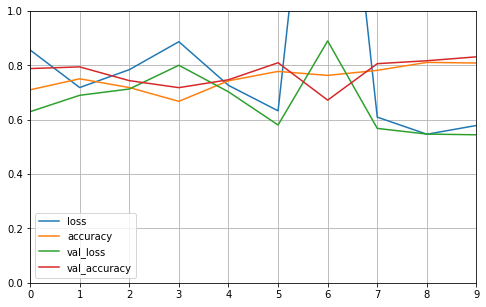

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_learning_curves(history)

In [19]:
# 使用测试集验证模型的准确度
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 1s 118us/sample - loss: 0.5976 - accuracy: 0.8099


[0.5976362979412079, 0.8099]